In [1]:
import autogis

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# load the geocordinates of the study areas
areas = autogis.GeoPoint(file='data/study_areas.csv')
geodata = areas.geodata
geodata

,city,place,y,x,geometry
0,Accra,Airport Residential Area,5.606246,-0.185884,POINT (-0.18588 5.60625)
1,Accra,Darkuman,5.590274,-0.250425,POINT (-0.25043 5.59027)
2,Accra,Nungua Central,5.610361,-0.086168,POINT (-0.08617 5.61036)
3,Kumasi,Adum,6.691810,-1.628995,POINT (-1.62900 6.69181)
4,Kumasi,Tafo,6.739872,-1.604349,POINT (-1.60435 6.73987)
5,Kumasi,Atonsu,6.655469,-1.608824,POINT (-1.60882 6.65547)


In [7]:
import matplotlib.colors as colors
import matplotlib.cm as cm
from IPython.display import Image

In [8]:
files = [f"data/{'_'.join(n.split(' '))}" for n in geodata.place]

In [30]:
def black_bg_plot(G, **kwargs):
    """plot street network black graph on white background
    """
    return ox.plot_graph(
        G,
        figsize=(10, 10),  # figure size to create if ax is None
        bgcolor="w",  # background color of the plot
        node_color="black",  # color of the nodes
        node_size=20,  # size of the nodes: if 0, skip plotting them
        edge_color="black",  # color of the edges
        edge_linewidth=1.5,  # width of the edges: if 0, skip plotting them
        dpi=300,  # if save is True, the resolution of saved file
        **kwargs)

def visualize_edge_centrality(G, **kwargs):
    """calculate and plot centrality for each street in the graph
    the color map depicts the most central streets in bright yellow
    and least central in dark purple
    
    Returns:
        fig, ax
    """
    edge_centrality = nx.closeness_centrality(nx.line_graph(G))
    ev = [edge_centrality[edge + (0,)] for edge in G.edges()]
    norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
    cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
    ec = [cmap.to_rgba(cl) for cl in ev]
    return ox.plot_graph(
        G,
        bgcolor='white',
        figsize=(10, 10),
        node_size=0,
        edge_color=ec,
        edge_linewidth=2,
        edge_alpha=1,
        dpi=300,
        show=False,
        **kwargs)

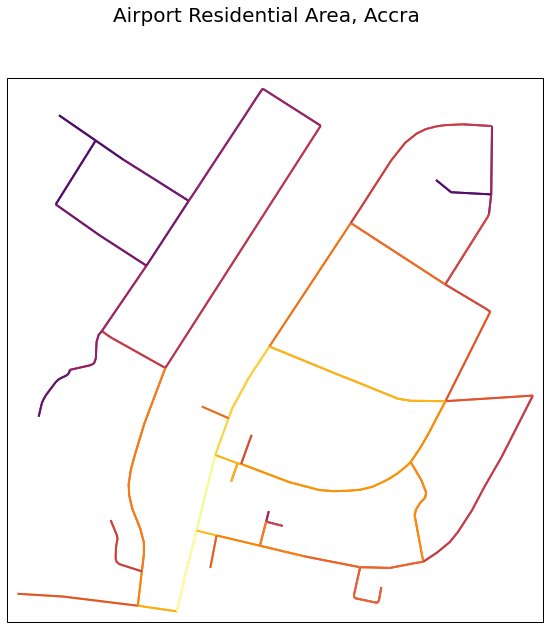

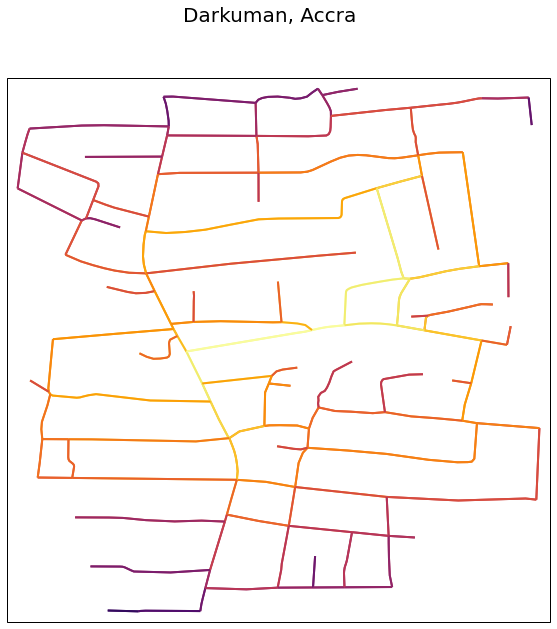

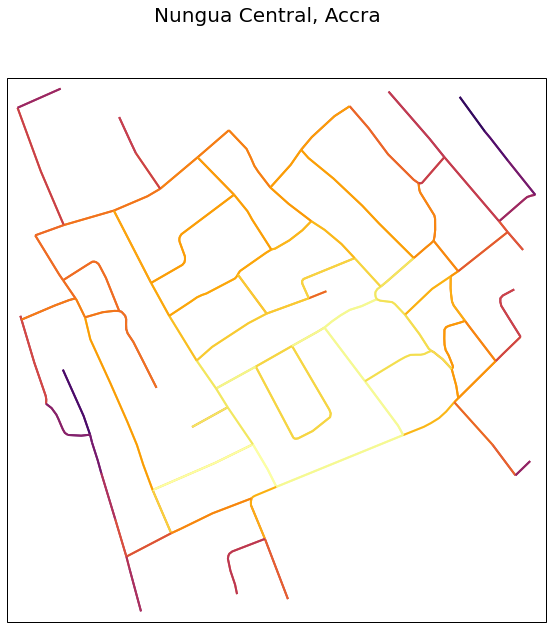

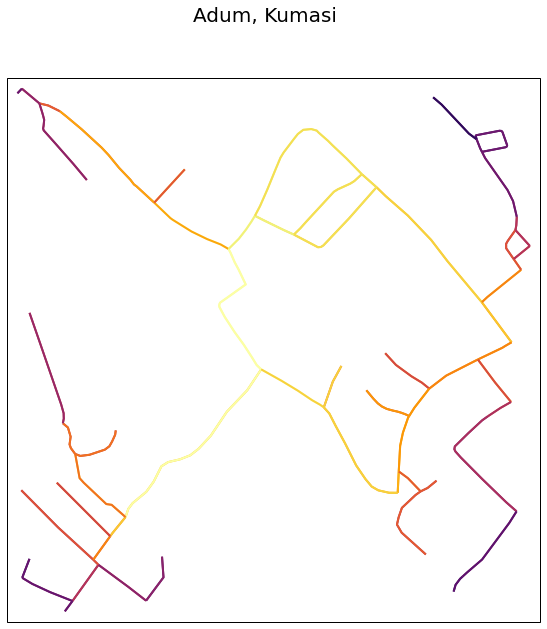

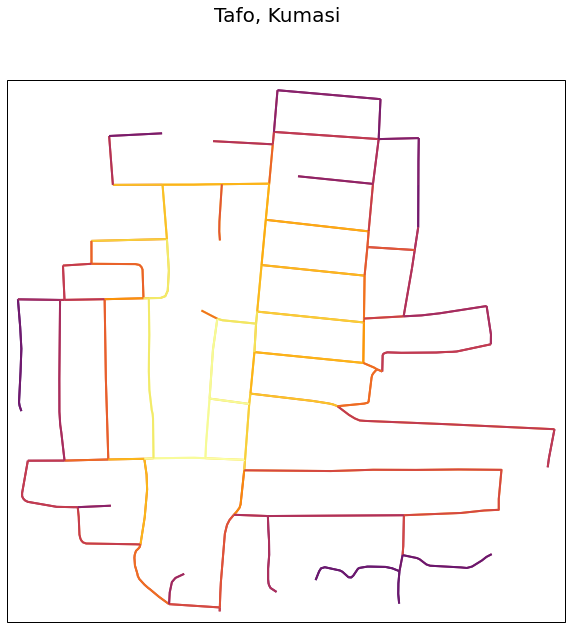

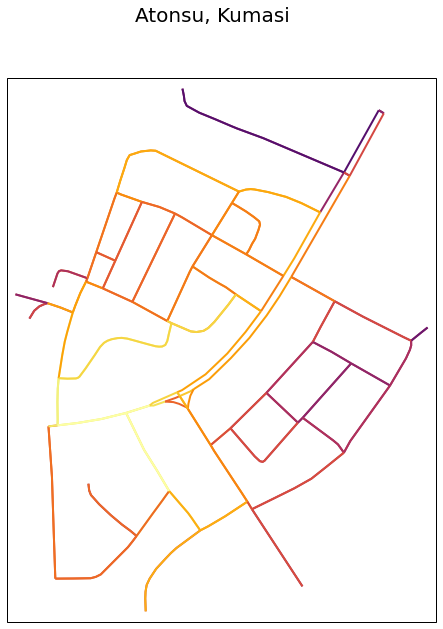

In [38]:
# save edge centrality plot for each study area
for name, city, place in zip(files, geodata.city, geodata.place):
    fig, ax = visualize_edge_centrality(ox.load_graphml(name))
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_edge_centrality.png"
    fig.savefig(img_name)

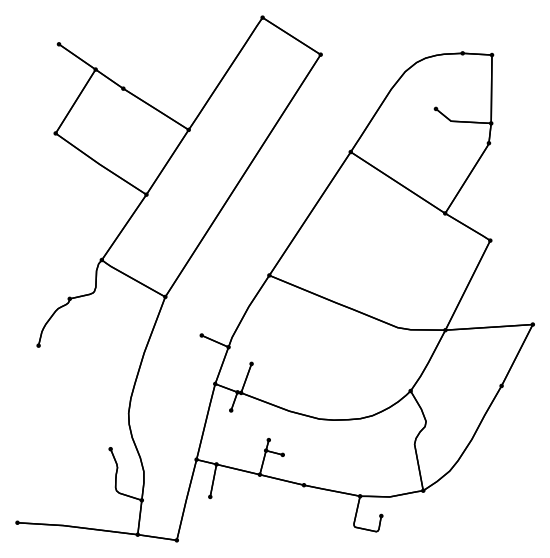

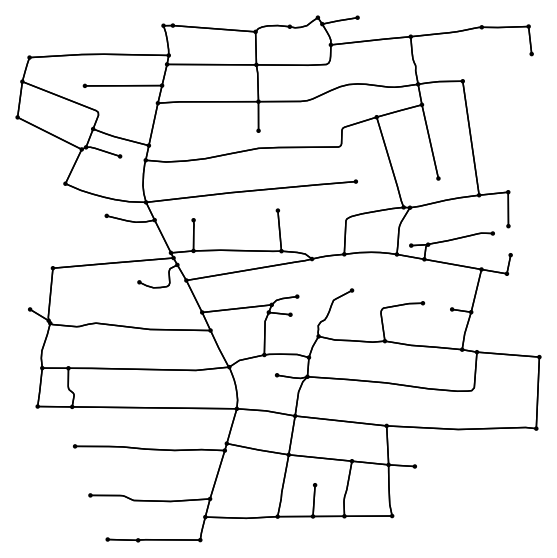

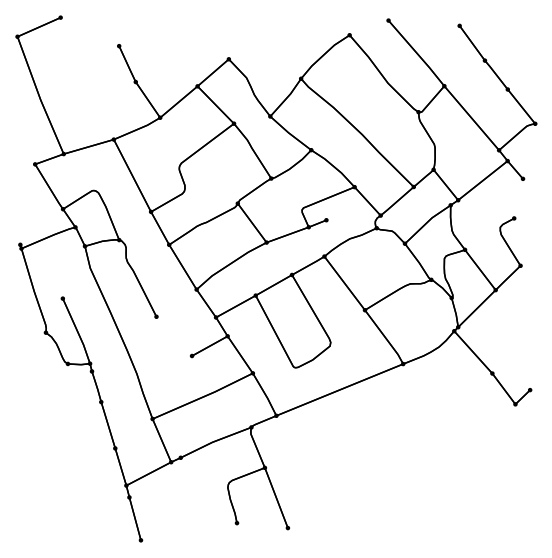

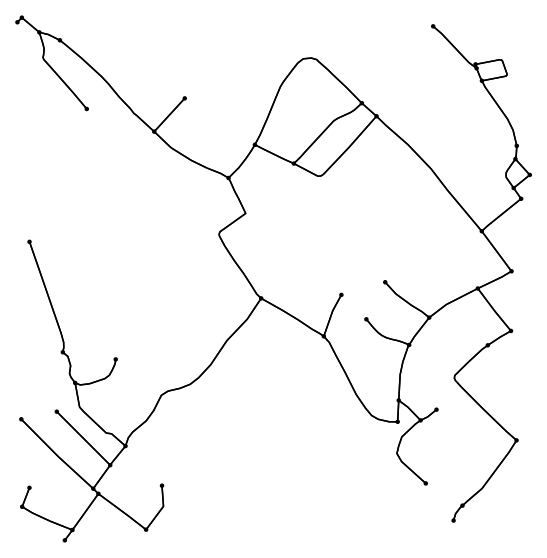

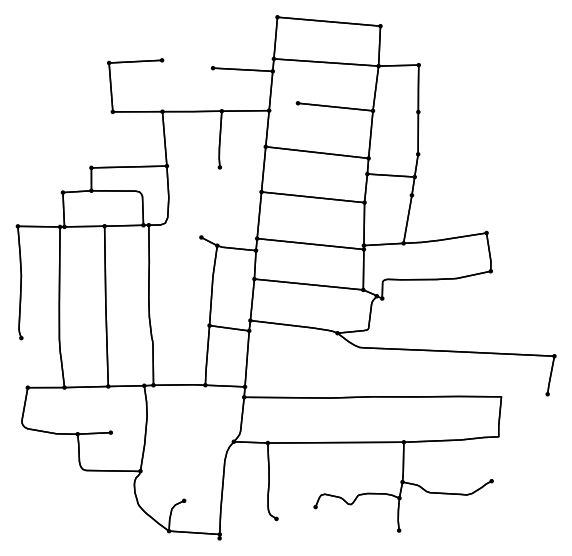

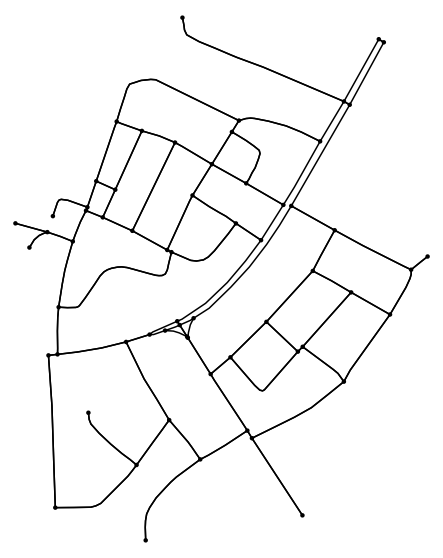

In [39]:
for name, city, place in zip(files, geodata.city, geodata.place):
    fig, ax = black_bg_plot(ox.load_graphml(name))
    ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_black_white.png"
    fig.savefig(img_name)

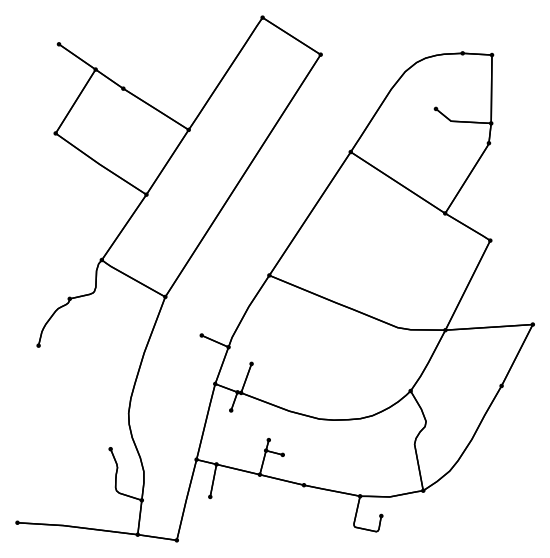

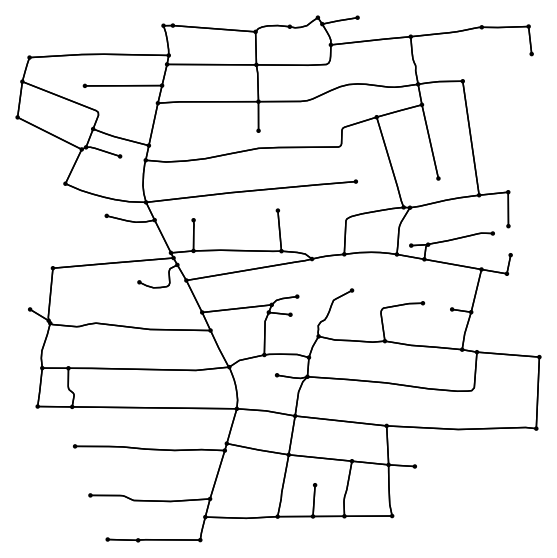

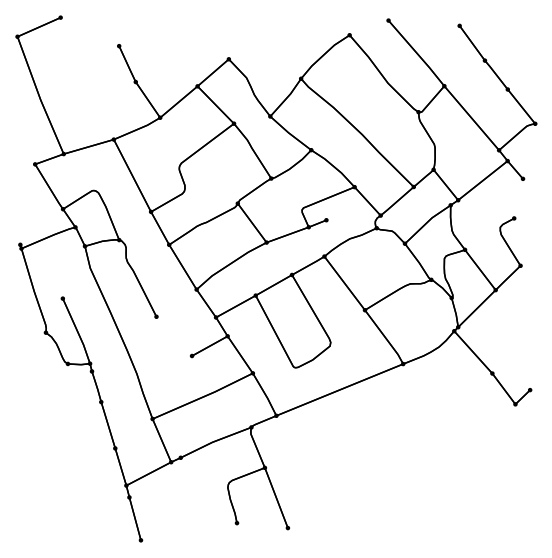

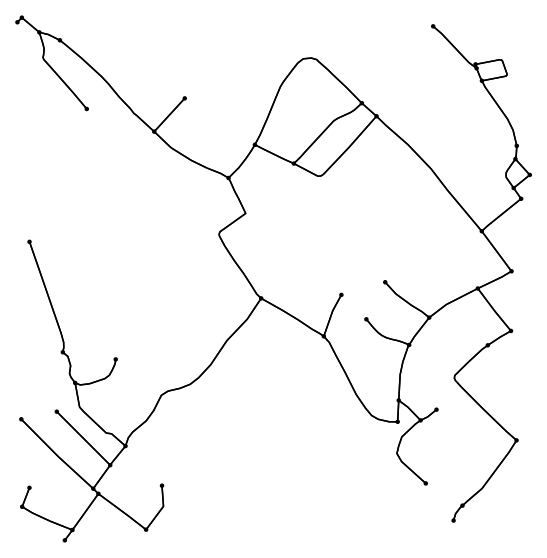

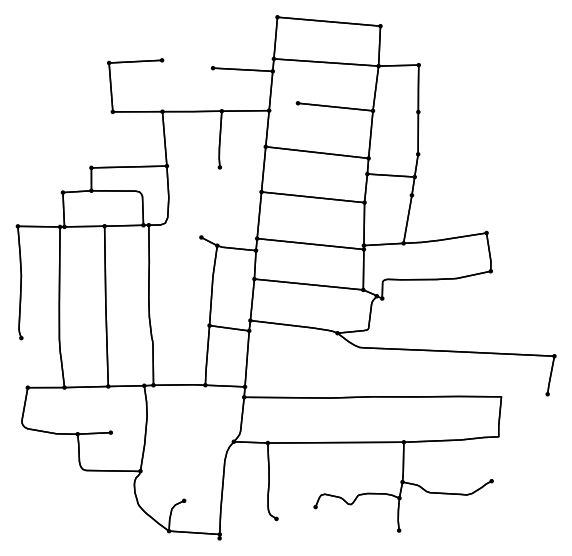

KeyError: 'name'

In [40]:
# annotate the plot with the names of edges gotten from OSM
for name, city, place in zip(files, geodata.city, geodata.place):
    G = ox.load_graphml(name)
    fig, ax = black_bg_plot(ox.load_graphml(name))
    for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna("").iterrows():
        text = edge["name"]
        c = edge["geometry"].centroid
        ax.annotate(text, (c.x, c.y), c="y")
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_annotate.png"
    fig.savefig(img_name)